--------Data Overview-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None

Target Variable Distribution:
y
no     0.883015
yes    0.116

<function matplotlib.pyplot.show(close=None, block=None)>

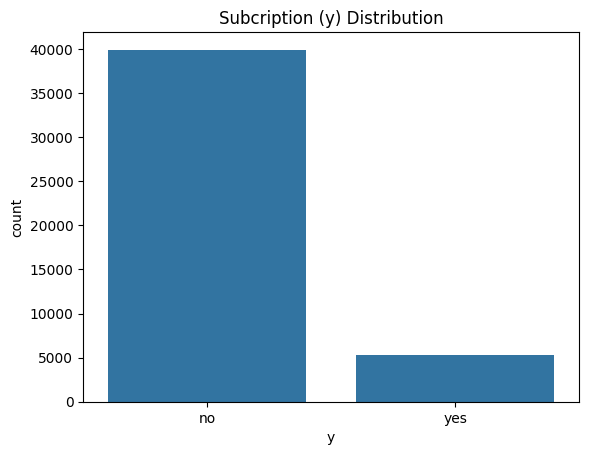

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df_bank = pd.read_csv('DataSets/bank-full.csv',sep=';')
print('--------Data Overview-----------')
print(df_bank.info())
print('\nTarget Variable Distribution:')
print(df_bank['y'].value_counts(normalize=True))
# quick visualization
sns.countplot(x='y', data=df_bank)
plt.title('Subcription (y) Distribution')
plt.show


In [2]:
#Convert Target 'y' to 1 and 0
df_bank['y'] = df_bank['y'].map({'yes': 1, 'no': 0})
#identify categorical features
cat_cols = df_bank.select_dtypes(include=['object']).columns
#one-hot coding for all other categorical features
df_encoded = pd.get_dummies(df_bank,columns=cat_cols, drop_first=True)
print(f'New Shape after encoding: {df_encoded.shape}')
print(df_encoded.info())

New Shape after encoding: (45211, 43)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   balance              45211 non-null  int64
 2   day                  45211 non-null  int64
 3   duration             45211 non-null  int64
 4   campaign             45211 non-null  int64
 5   pdays                45211 non-null  int64
 6   previous             45211 non-null  int64
 7   y                    45211 non-null  int64
 8   job_blue-collar      45211 non-null  bool 
 9   job_entrepreneur     45211 non-null  bool 
 10  job_housemaid        45211 non-null  bool 
 11  job_management       45211 non-null  bool 
 12  job_retired          45211 non-null  bool 
 13  job_self-employed    45211 non-null  bool 
 14  job_services         45211 non-null  bool 
 15  job_student          45211 non-n

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
#Define X and y
X = df_encoded.drop('y',axis=1)
y = df_encoded['y']
#Split the data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y)

# 1. Logistic Regression with scaling
lr_model = make_pipeline(StandardScaler(),LogisticRegression(max_iter=1000))
lr_model.fit(X_train, y_train)
# 2. Random Forest 
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


-----------Logistic Regression Performance-------------
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7985
           1       0.64      0.35      0.45      1058

    accuracy                           0.90      9043
   macro avg       0.78      0.66      0.70      9043
weighted avg       0.89      0.90      0.89      9043


--------Random Forest Performance--------
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7985
           1       0.66      0.39      0.49      1058

    accuracy                           0.90      9043
   macro avg       0.79      0.68      0.72      9043
weighted avg       0.89      0.90      0.89      9043



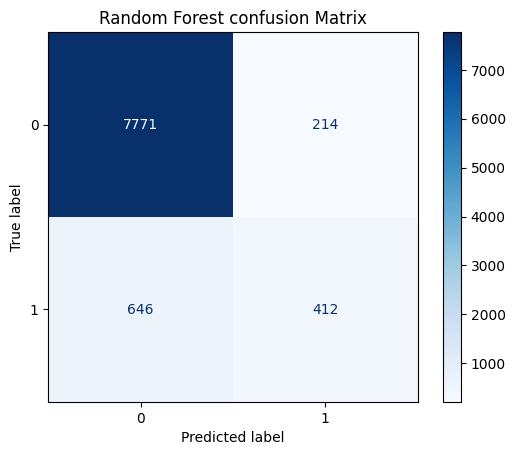

In [4]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve,auc, ConfusionMatrixDisplay
# get prediction form both models
y_pred_lr = lr_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# print classification reports
print('-----------Logistic Regression Performance-------------')
print(classification_report(y_test, y_pred_lr))
print('\n--------Random Forest Performance--------')
print(classification_report(y_test, y_pred_rf))
#visuallizing the confusion Matrix
disp = ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test, cmap='Blues')
plt.title("Random Forest confusion Matrix")
plt.show()

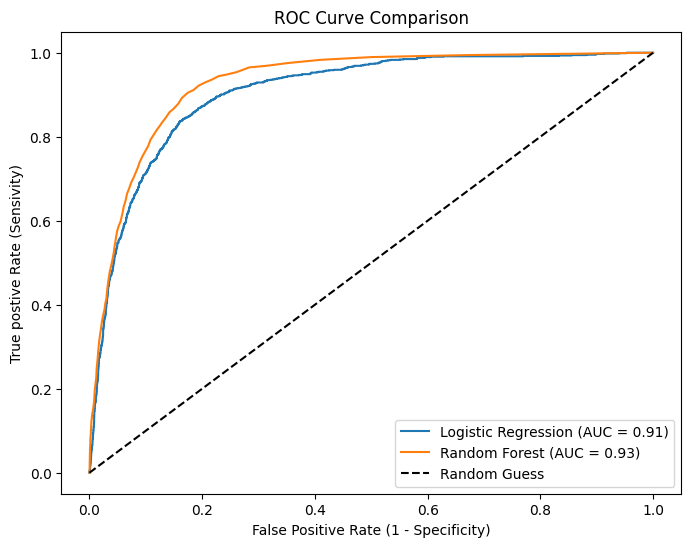

In [5]:
# Get Probablities form 'YES' class (1)
lr_probs = lr_model.predict_proba(X_test)[:, 1]
rf_probs = rf_model.predict_proba(X_test)[:, 1]
#Calculate ROC Values
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_probs)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
#plotting
plt.figure(figsize=(8,6))
plt.plot(fpr_lr, tpr_lr , label = f'Logistic Regression (AUC = {auc(fpr_lr, tpr_lr):.2f})')
plt.plot(fpr_rf, tpr_rf , label = f'Random Forest (AUC = {auc(fpr_rf, tpr_rf):.2f})')
plt.plot([0,1],[0,1], 'k--', label = 'Random Guess')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True postive Rate (Sensivity)')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

--- Explanation for Customer Index: 1392 ---


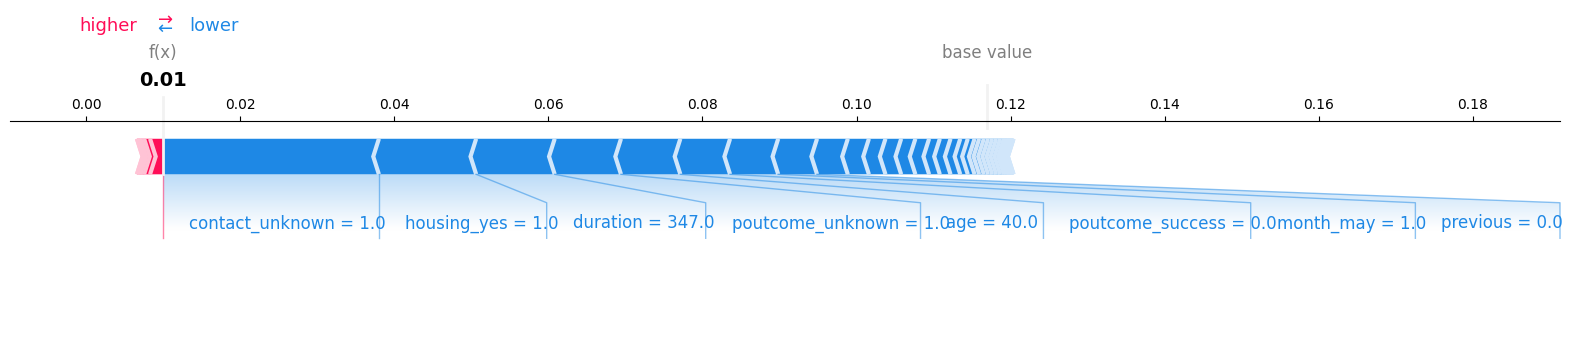

--- Explanation for Customer Index: 7518 ---


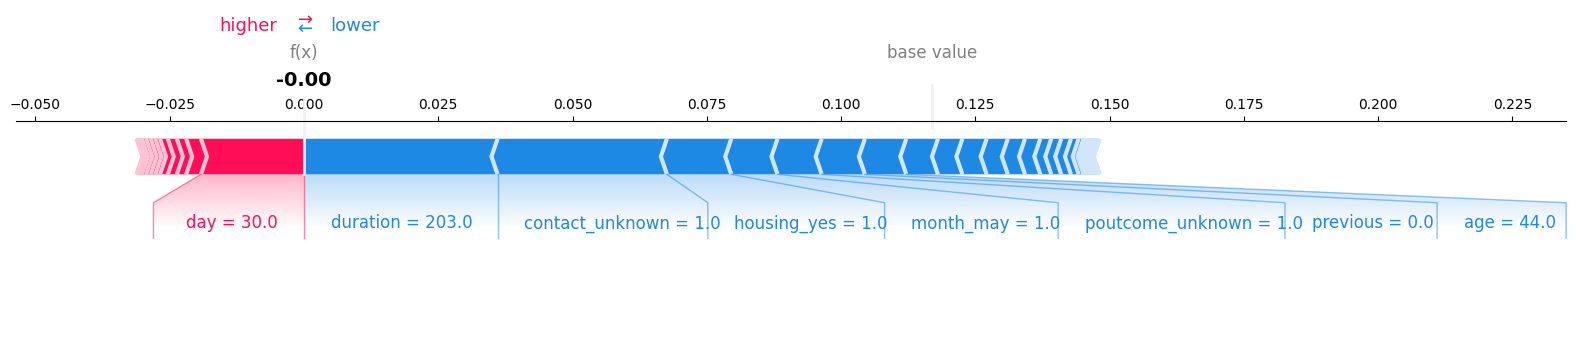

--- Explanation for Customer Index: 12007 ---


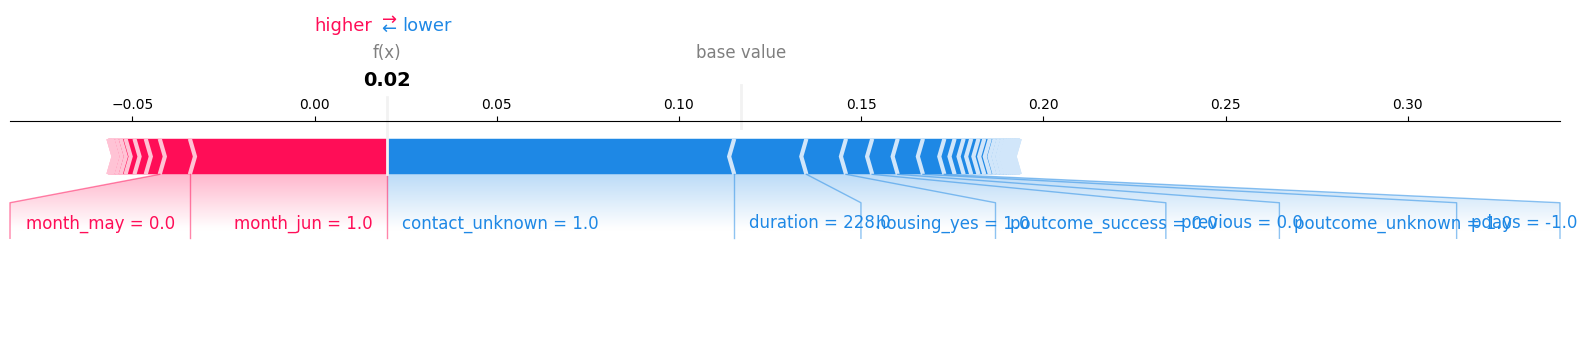

--- Explanation for Customer Index: 5536 ---


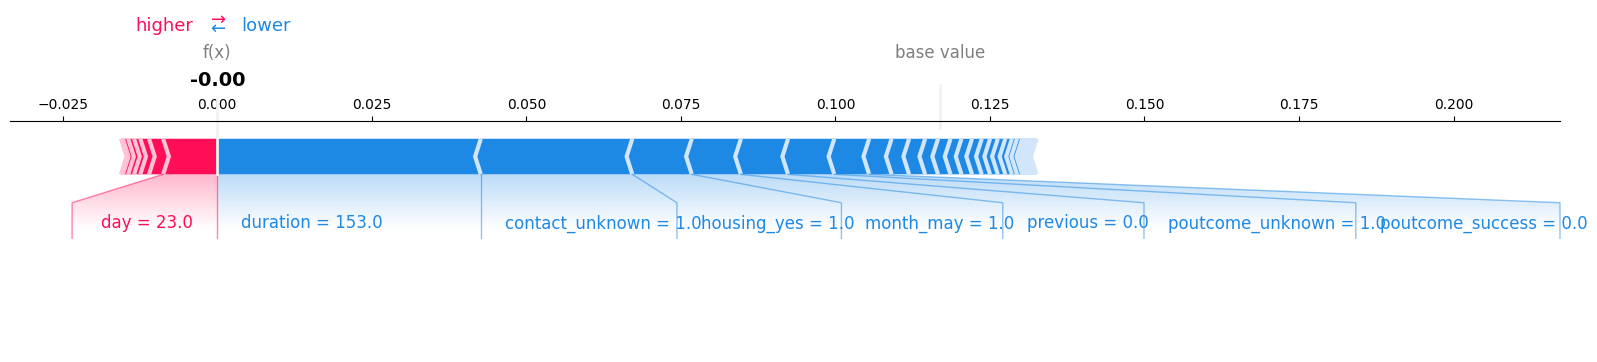

--- Explanation for Customer Index: 29816 ---


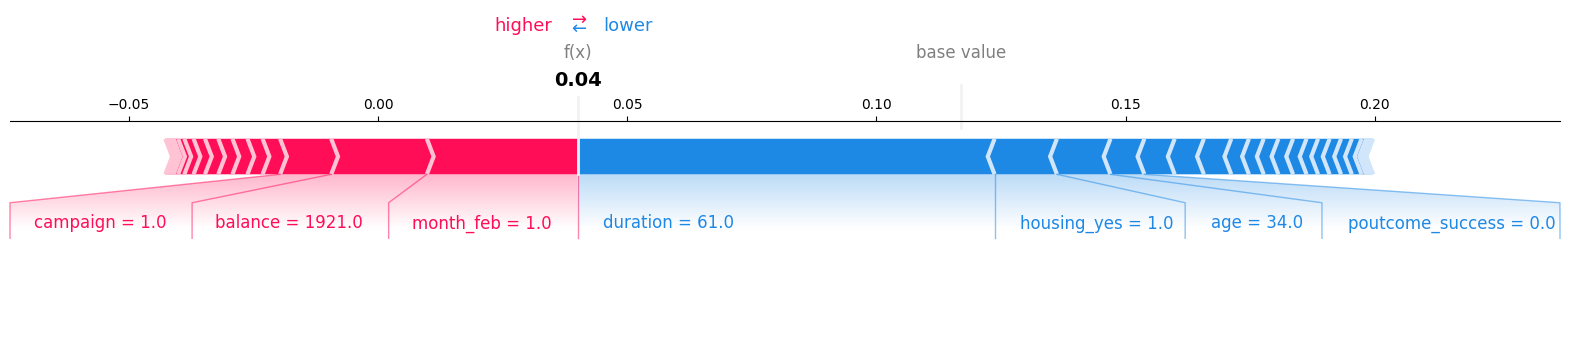

In [9]:
import shap

explainer = shap.TreeExplainer(rf_model)
X_explain = X_test.head(5)
shap_values = explainer.shap_values(X_explain)

# plot the explaination for the first 5 individuals
shap.initjs()

for i in range(5):
    print(f"--- Explanation for Customer Index: {X_explain.index[i]} ---")
    if isinstance(shap_values, list):
        current_shap_values = shap_values[1][i]
        expected_val = explainer.expected_value[1]
    else:
        current_shap_values = shap_values[i, :, 1]
        expected_val = explainer.expected_value[1]

    # Plotting
    shap.force_plot(
        expected_val,
        current_shap_values,
        X_explain.iloc[i, :],
        matplotlib=True
    )
    plt.show()